In [1]:
import os
import tensorflow as tf
import pandas as pd
from dataset_path import output_path
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import os
from thesis_helper import * 

pd.set_option('float_format', '{:.3f}'.format)
path = output_path

output_path = os.path.join(path, "Figure3")
if not os.path.exists(output_path):
    os.makedirs(output_path)
df_train = pd.read_csv((os.path.join(path, 'train.csv')))
df_test = pd.read_csv((os.path.join(path, 'test.csv')))
confidence_interval = 95
random_seed = 0
result_list = []


Dividing variable into groups

In [2]:
X_train,y_train,X_test,y_test = preprocessing(path,df_train,df_test)

Before filtering: training size = 334480 , testing size = 83620
After filtering: training size = 176213 , testing size = 44063


In [3]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)
clf.feature_importances_  



array([0.06613287, 0.01361387, 0.02114971, 0.02719525, 0.0362929 ,
       0.01168329, 0.01346493, 0.02038203, 0.00157986, 0.00282857,
       0.00496979, 0.03820281, 0.02700473, 0.00625858, 0.00803113,
       0.00640134, 0.00034558, 0.00624333, 0.00312557, 0.00473383,
       0.002822  , 0.00205093, 0.00322005, 0.00356913, 0.0038536 ,
       0.0031804 , 0.003749  , 0.00161773, 0.00744209, 0.00221277,
       0.0019961 , 0.00496678, 0.00648469, 0.00343484, 0.00161145,
       0.00321491, 0.00394696, 0.00174914, 0.00213394, 0.00196577,
       0.00610594, 0.00301499, 0.00309713, 0.00332046, 0.00700216,
       0.00539031, 0.00502039, 0.00119213, 0.00446081, 0.00624858,
       0.00393434, 0.00591381, 0.00171365, 0.00446622, 0.00674768,
       0.00708398, 0.00376538, 0.00693425, 0.06414969, 0.06542369,
       0.04868403, 0.0496286 , 0.06501515, 0.06467276, 0.07346303,
       0.04583072, 0.05285787])

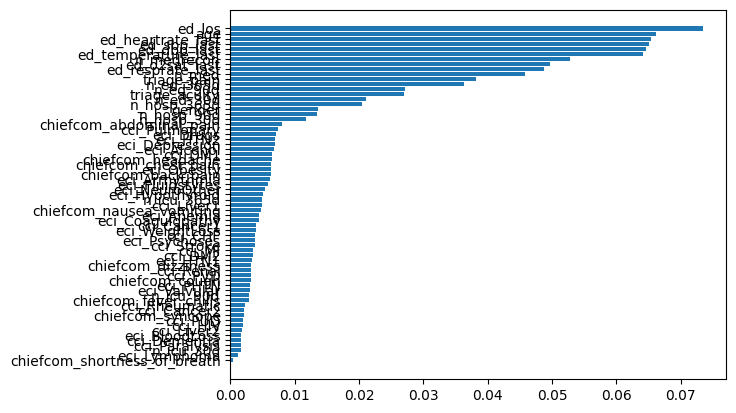

In [4]:
import matplotlib.pyplot as plt
features = X_train.columns
f_i = list(zip(features,clf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()

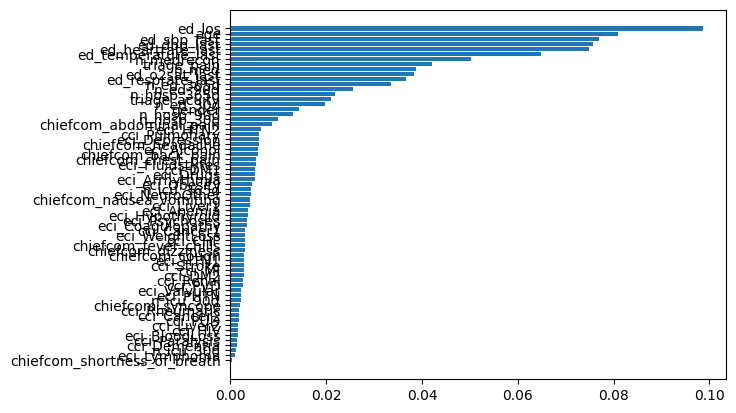

<Figure size 1000x600 with 0 Axes>

In [5]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
features = X_train.columns
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.figure(figsize=(10,6))
plt.show()

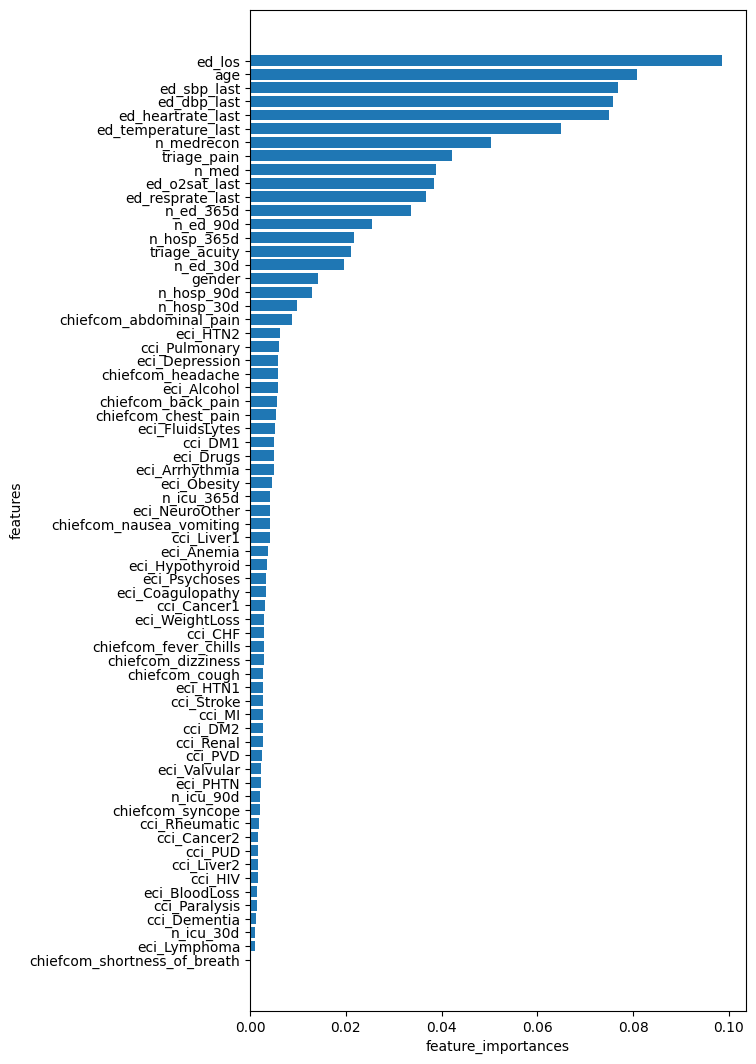

In [6]:

plt.figure().set_figheight(13)
plt.xlabel('feature_importances')
plt.ylabel('features')
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [7]:
features

Index(['age', 'gender', 'n_ed_30d', 'n_ed_90d', 'n_ed_365d', 'n_hosp_30d',
       'n_hosp_90d', 'n_hosp_365d', 'n_icu_30d', 'n_icu_90d', 'n_icu_365d',
       'triage_pain', 'triage_acuity', 'chiefcom_chest_pain',
       'chiefcom_abdominal_pain', 'chiefcom_headache',
       'chiefcom_shortness_of_breath', 'chiefcom_back_pain', 'chiefcom_cough',
       'chiefcom_nausea_vomiting', 'chiefcom_fever_chills', 'chiefcom_syncope',
       'chiefcom_dizziness', 'cci_MI', 'cci_CHF', 'cci_PVD', 'cci_Stroke',
       'cci_Dementia', 'cci_Pulmonary', 'cci_Rheumatic', 'cci_PUD',
       'cci_Liver1', 'cci_DM1', 'cci_DM2', 'cci_Paralysis', 'cci_Renal',
       'cci_Cancer1', 'cci_Liver2', 'cci_Cancer2', 'cci_HIV', 'eci_Arrhythmia',
       'eci_Valvular', 'eci_PHTN', 'eci_HTN1', 'eci_HTN2', 'eci_NeuroOther',
       'eci_Hypothyroid', 'eci_Lymphoma', 'eci_Coagulopathy', 'eci_Obesity',
       'eci_WeightLoss', 'eci_FluidsLytes', 'eci_BloodLoss', 'eci_Anemia',
       'eci_Alcohol', 'eci_Drugs', 'eci_Psychose

In [8]:

df = pd.DataFrame(list(zip(features,rf.feature_importances_)),columns = ["features","importance"])

In [9]:
f_i.sort(key = lambda x : x[1],reverse= True)
rslt_df = df[df['importance'] > 0.01] 
features_new = rslt_df['features']
X_train1 = X_train[features_new]
X_test1 = X_test[features_new]

Logistic regression(without feature selection)

C:\Users\Desktop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.6815494692500426
AUPRC: 0.16248729316318267
Sensitivity: 0.5988805970149254
Specificity: 0.6587227748753548
Score thresold: 0.04371526323940685
2.5 97.5


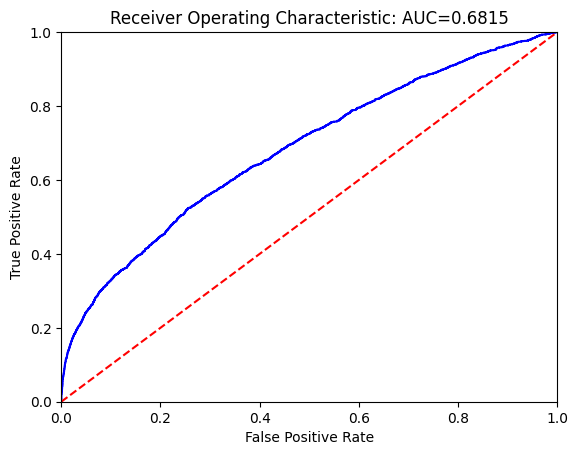

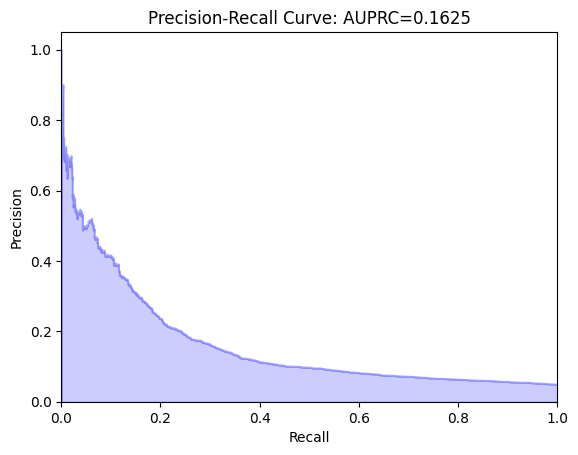

In [10]:
lo,result,runtime = LR_result(X_train,y_train,X_test,y_test,confidence_interval,random_seed)

CM for train

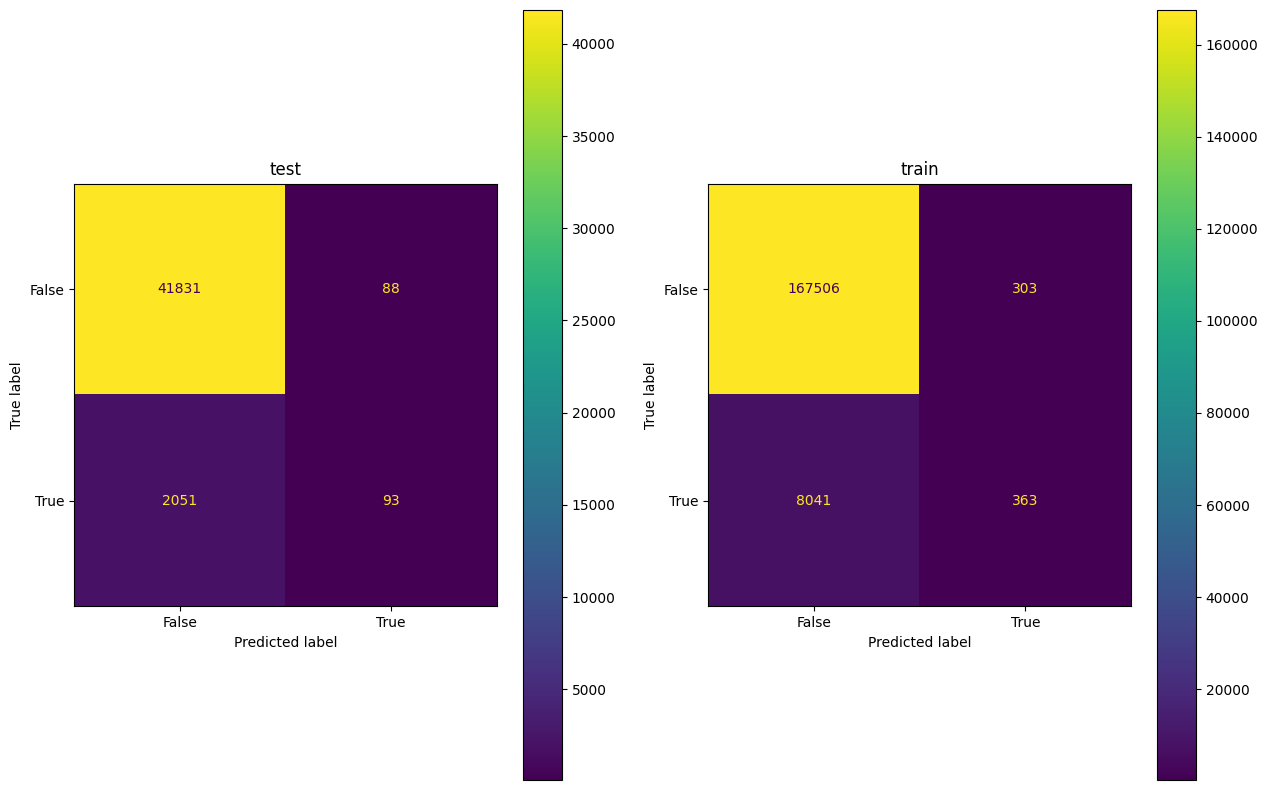

In [11]:
CM_plot_train_test(lo,X_train,y_train,X_test,y_test)

In [12]:
find_sens_speci(lo,X_test,y_test)

(0.08, 0.951455870004312, 0.9979007132803741, 0.04337686567164179)

Tree based feature selection(Meta-transformer for selecting features based on importance weights.)

C:\Users\Desktop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Desktop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Desktop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alt

AUC: 0.6770457030135945
AUPRC: 0.16011449231784383
Sensitivity: 0.5844216417910447
Specificity: 0.6729406712946396
Score thresold: 0.044754843103026846
2.5 97.5


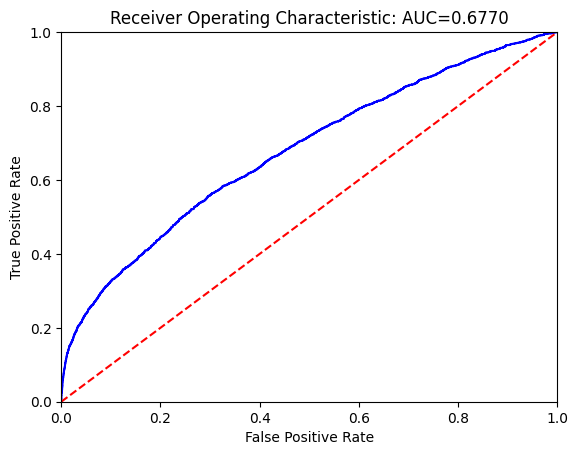

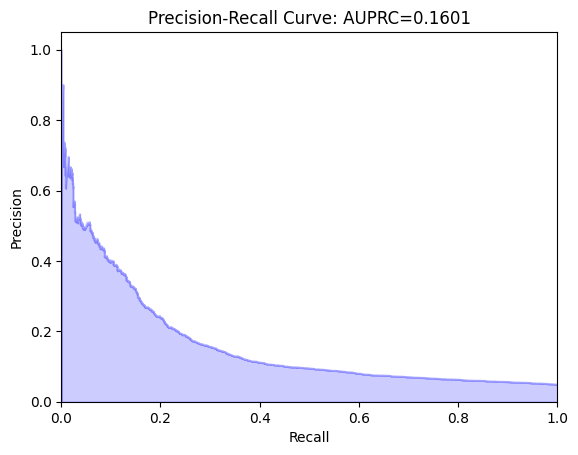

In [13]:
feature_name,X_new,Xtest_new = tree_based_fs(X_train, y_train,X_test)
tree_fs_model,result,runtime = LR_result(X_new,y_train,Xtest_new,y_test,confidence_interval,random_seed)

CM for train

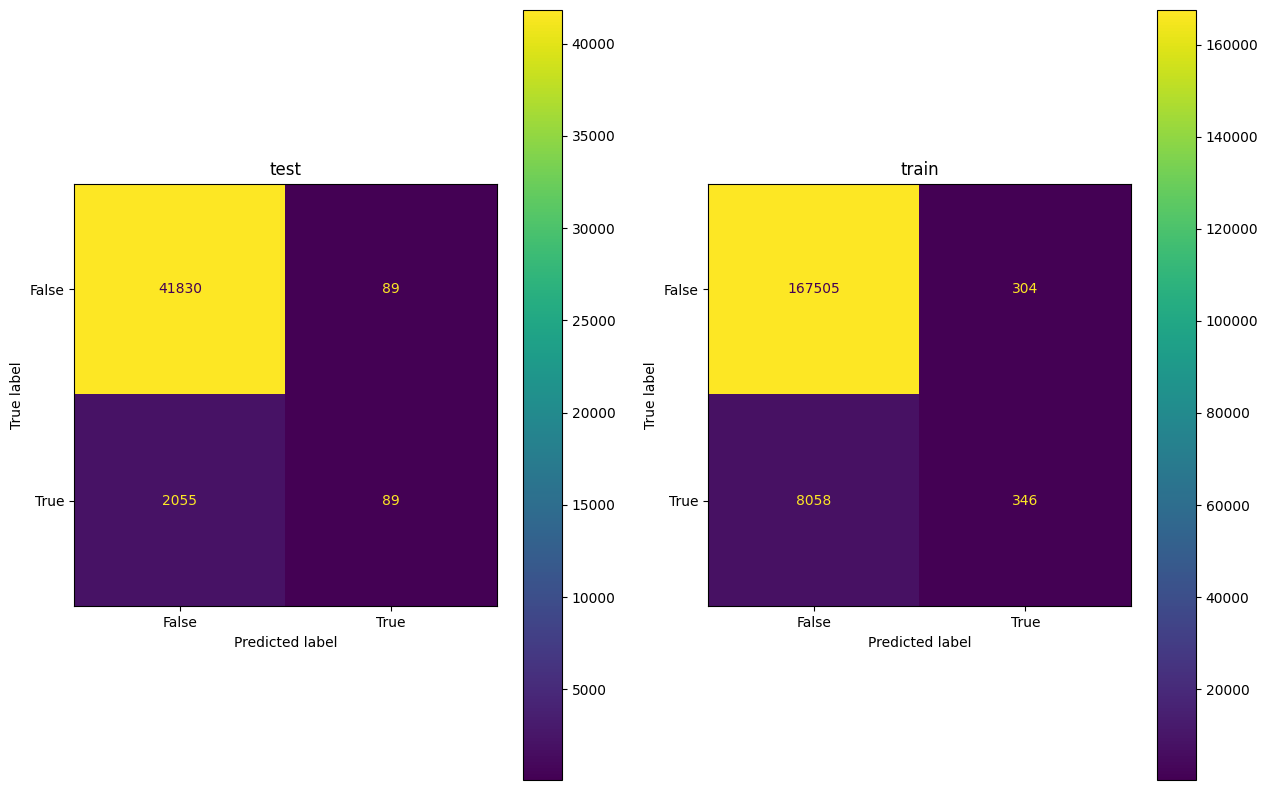

In [14]:
CM_plot_train_test(tree_fs_model,X_new,y_train,Xtest_new,y_test)

159405 new random picked points


C:\Users\Desktop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.6851973070488109
AUPRC: 0.16231543890695793
Sensitivity: 0.5984141791044776
Specificity: 0.6641379803907537
Score thresold: 0.4632979644016959
2.5 97.5


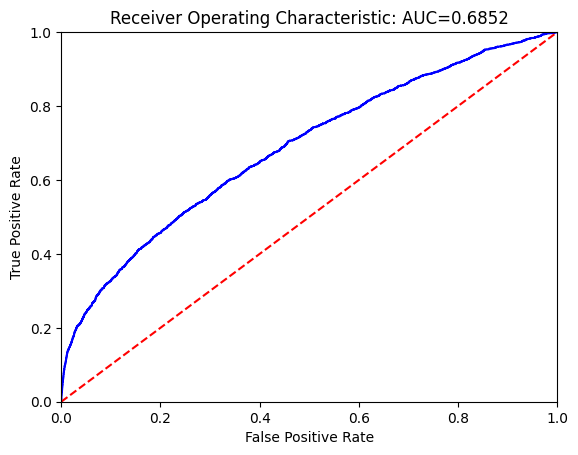

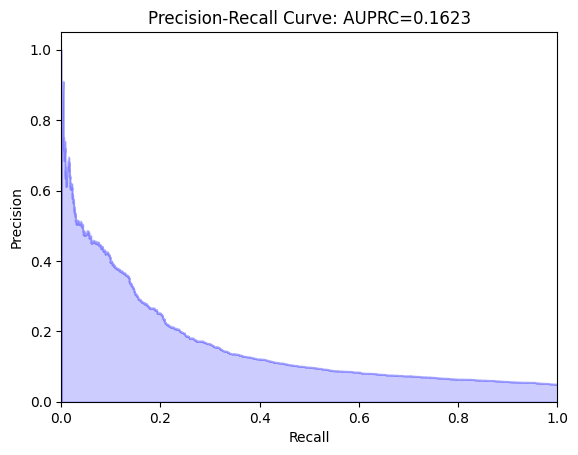

In [26]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority')
X_ros, y_ros = ros.fit_resample(X_train,y_train)

print(X_ros.shape[0] - X_train.shape[0], 'new random picked points')
Oversample_fs_lr,result,runtime = LR_result(X_ros,y_ros,X_test,y_test,confidence_interval,random_seed)

159405 new random picked points


C:\Users\Desktop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.6034912792012171
AUPRC: 0.12091924492204292
Sensitivity: 0.5555037313432836
Specificity: 0.6022805887545027
Score thresold: 0.4470246208578652
2.5 97.5


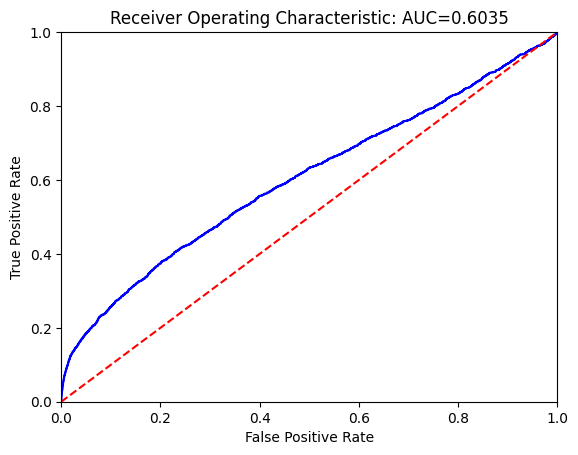

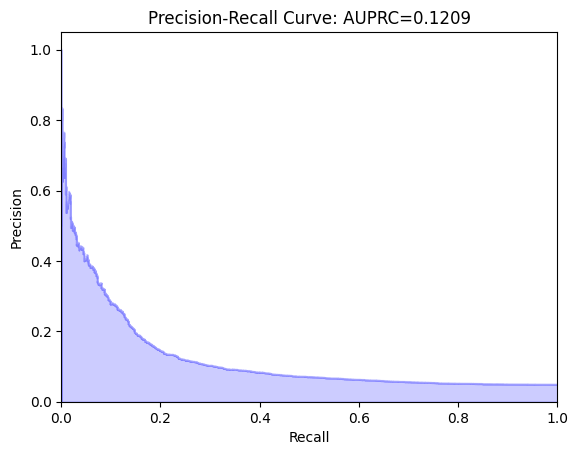

(0.12955906369080022,
 0.7096884006989992,
 0.7232758415038527,
 0.44402985074626866)

In [30]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_ros, y_ros = sm.fit_resample(X_train,y_train)

print(X_ros.shape[0] - X_train.shape[0], 'new random picked points')
oversampler_model,result,runtime = LR_result(X_ros, y_ros,X_test,y_test,confidence_interval,random_seed)
find_sens_speci(oversampler_model,X_test,y_test)

159405 new random picked points


C:\Users\Desktop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.6358389451689523
AUPRC: 0.13766026504891582
Sensitivity: 0.5648320895522388
Specificity: 0.6400916052386746
Score thresold: 0.42197412106185794
2.5 97.5


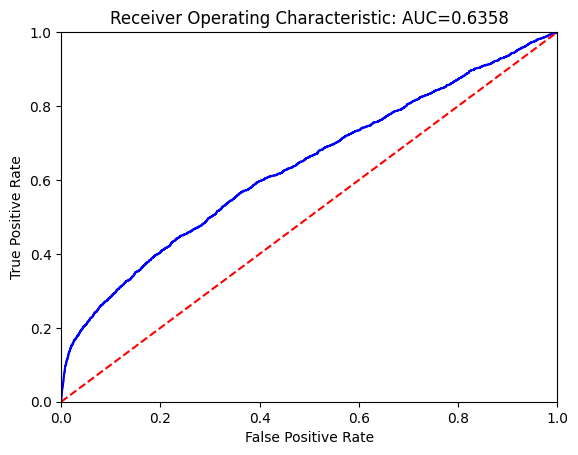

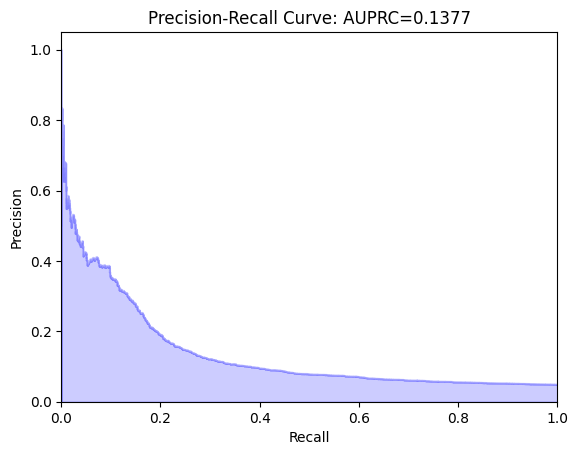

(0.14897146648971468,
 0.7671515784218051,
 0.7849662444237696,
 0.41884328358208955)

In [33]:
from imblearn.over_sampling import BorderlineSMOTE

ros = BorderlineSMOTE()
X_ros, y_ros = ros.fit_resample(X_train,y_train)

print(X_ros.shape[0] - X_train.shape[0], 'new random picked points')
bs_model,result,runtime = LR_result(X_ros, y_ros,X_test,y_test,confidence_interval,random_seed)
find_sens_speci(bs_model,X_test,y_test)

161239 new random picked points


C:\Users\Desktop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.596059402319256
AUPRC: 0.11396239310688905
Sensitivity: 0.498134328358209
Specificity: 0.6682411317063861
Score thresold: 0.4899663230411368
2.5 97.5


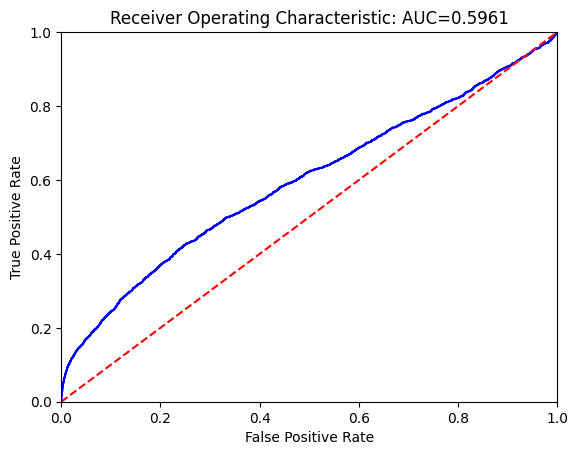

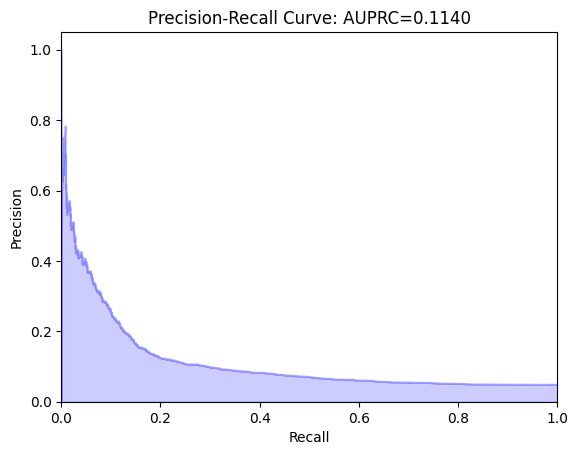

(0.12664842000497636,
 0.6813653178403649,
 0.6919296738948926,
 0.4748134328358209)

In [34]:
from imblearn.over_sampling import ADASYN

oversample = ADASYN()
X_ros, y_ros = oversample.fit_resample(X_train,y_train)

print(X_ros.shape[0] - X_train.shape[0], 'new random picked points')
ad_model,result,runtime = LR_result(X_ros, y_ros,X_test,y_test,confidence_interval,random_seed)
find_sens_speci(ad_model,X_test,y_test)

CM for test

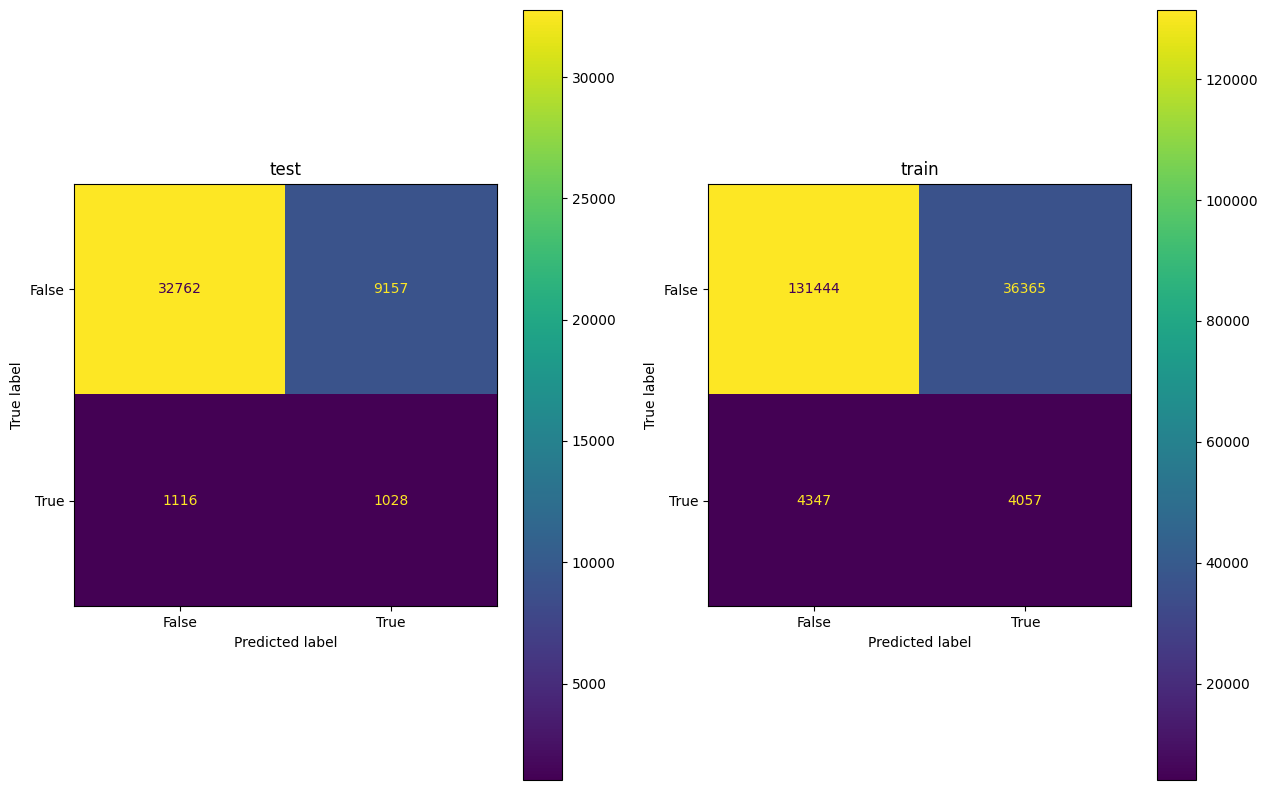

In [18]:
CM_plot_train_test(variancethreshold_oversampler_model,X_after_sel, y_train,Xtest_after_sel,y_test)

Oversampling 

In [19]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority')
X_ros, y_ros = ros.fit_resample(X_train,y_train)

print(X_ros.shape[0] - X_train.shape[0], 'new random picked points')

159405 new random picked points


In [20]:
t_l = 0
f_l = 0
for x in y_ros:
    if x == False:
        f_l += 1
    else:
        t_l += 1

C:\Users\Desktop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.6860252630962415
AUPRC: 0.16309454574766508
Sensitivity: 0.585820895522388
Specificity: 0.6718671724039218
Score thresold: 0.4639997557761182
2.5 97.5


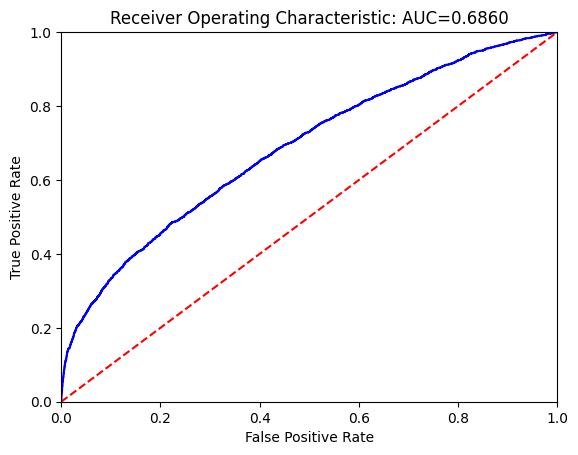

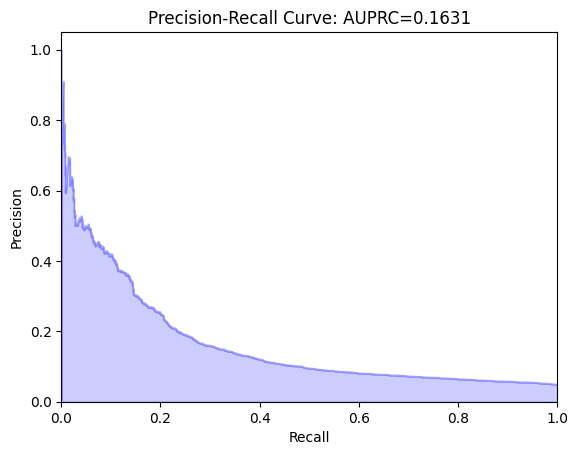

In [21]:
oversampler_model,result,runtime = LR_result(X_ros,y_ros,X_test,y_test,confidence_interval,random_seed)

CM for test

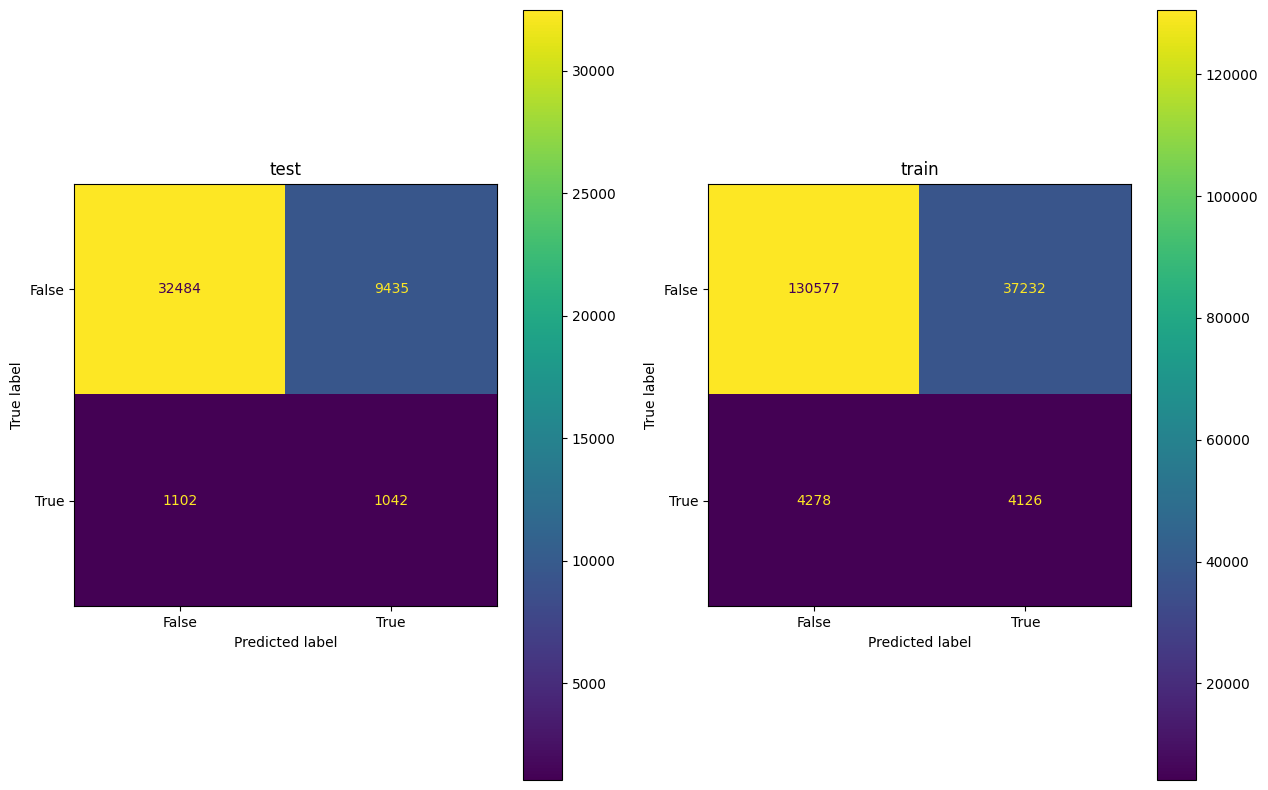

In [22]:
CM_plot_train_test(oversampler_model,X_train,y_train,X_test,y_test)